In [1]:
import numpy as np
import matplotlib.pyplot as plt

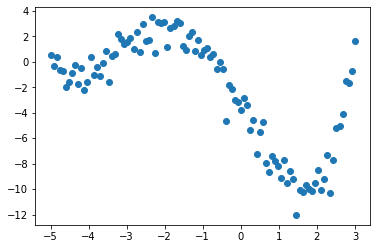

In [2]:
X=np.linspace(-5,3,100)
y=0.1*(X-3)*(X+3)*(X+1)*(X+5)
y+=1*np.random.normal(1,size=100)
plt.scatter(X,y)

In [3]:
data=np.column_stack((X,y))

NameError: name 'X_' is not defined

## Train-test-split

In [ ]:
# 데이터를 무작위로 섞음
np.random.shuffle(data)
# data # 순서 바뀌는것 확인

In [ ]:
train=data[:70,:]
test=data[70:,:]

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

### train 데이터를 이용하여 훈련

In [ ]:
X_train=train[:,0].reshape(-1,1)
y_train=train[:,1]
reg.fit(X_train,y_train)

### test 데이터를 이용한 검증

In [ ]:
X_test=test[:,0].reshape(-1,1)
y_test=test[:,1]
y_pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

## sklearn을 이용한 train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X.reshape(-1,1),y,test_size=0.3,shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)


In [ ]:
mean_squared_error(y_test,y_pred)

## 차수를 변경해가며 검증

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
mse=[]
for i in range(1,20):
    poly=PolynomialFeatures(degree=i,include_bias=False)    
    reg.fit(poly.fit_transform(X_train),y_train)
    y_pred=reg.predict(poly.fit_transform(X_test))
    mse.append(mean_squared_error(y_test,y_pred))
plt.plot(mse)
    

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
for s in range(20):
    mse=[]
    X_train,X_test,y_train,y_test = train_test_split(data[:,0].reshape(-1,1),data[:,1],test_size=0.3,shuffle=True)
    for i in range(1,10):
        poly=PolynomialFeatures(degree=i,include_bias=False)    
        reg.fit(poly.fit_transform(X_train),y_train)
        y_pred=reg.predict(poly.fit_transform(X_test))
        mse.append(mean_squared_error(y_test,y_pred))
    plt.plot(mse)
    

data